## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objs as go
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, iplot_mpl
from plotly import tools
import chart_studio.plotly as py

from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

[nltk_data] Downloading package stopwords to C:\Users\Regular
[nltk_data]     X\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Regular
[nltk_data]     X\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Load the data
data_alu = pd.read_csv('clean_news_aluminium.csv')

In [4]:
data_alu.head()

Unnamed: 0                                              Title      Date  \
0        1409  ASIAN MORNING BRIEF 1/1: LME recommends Rusal ...  1/1/2019   
1        1403  LIVE FUTURES REPORT 02/01: Comex copper suffer...  1/2/2019   
2        1405  Erus Metals USA withdraws from LME warehouse s...  1/2/2019   
3        1406  SHFE vs LME physical arbitrage 02/01: Copper, ...  1/2/2019   
4        1407  LIVE FUTURES REPORT 02/01: LME base metals dow...  1/2/2019   

          Author                                            Summary  
0  Dalton Barker  The latest news and price moves to start the A...  
1  Dalton Barker  Comex copper futures softened in the first tra...  
2    Alice Mason  Erus Metals USA LLC has withdrawn from London ...  
3     Ellie Wang  Arbitrage for copper, aluminium, zinc and nick...  
4    Hassan Butt  Base metals prices on the London Metal Exchang...

In [5]:
# Extract hashtags and remove them from titles
data_alu['Title'] = data_alu['Title'].apply(lambda x: re.sub("#[A-Za-z0-9_]+","", str(x)))
data_alu['Title'] = data_alu['Title'].apply(lambda x: re.sub("#[A-Za-z0-9_]+","", str(x)))

In [6]:
# Extract mentions and remove them from titles
data_alu['Title'] = data_alu['Title'].apply(lambda x: re.sub("@([a-zA-Z0-9_]{1,50})","", str(x)))
data_alu['Title'] = data_alu['Title'].apply(lambda x: re.sub("@([a-zA-Z0-9_]{1,50})","", str(x)))

In [7]:
# Process titles
def processTweet(tweets):
    # Lower case text
    tweets = tweets.str.lower()
    
    # HTML tags
    tweets = tweets.str.replace(r"<[^<>]+>", " ")
    
    # Email address
    tweets = tweets.str.replace(r"[^\s]+@[^\s]+", '')
    
    # Handle URLS
    tweets = tweets.str.replace(r"(http|https)://[^\s]*", '')
    
    # Handle Numbers
    tweets = tweets.str.replace(r"[0-9]+", '')
    
    # Handle $ sign
    tweets = tweets.str.replace(r"[$]+", '')
    
    # Normalize punctuation
    transl_table = dict( [ (ord(x), ord(y)) for x,y in zip( u"‘’´“”–-",  u"'''\"\"--") ] ) 
    tweets = tweets.apply(lambda a: a.translate(transl_table))
    
    # Handle punctuation
    tweets = tweets.str.replace(r"[^\w]+", ' ')

    return tweets

data_alu['Title'] = processTweet(data_alu['Title'])

<ipython-input-7-3e5a27ec2e18>:7: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-7-3e5a27ec2e18>:10: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-7-3e5a27ec2e18>:13: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-7-3e5a27ec2e18>:16: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-7-3e5a27ec2e18>:19: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-7-3e5a27ec2e18>:26: FutureWarning:

The default value of regex will change from True to False in a future version.



In [8]:
# Remove stopwords
stop_words = stopwords.words('english')
data_alu['Title'] = data_alu['Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [9]:
data_alu.dtypes

Unnamed: 0     int64
Title         object
Date          object
Author        object
Summary       object
dtype: object

In [10]:
# Stem the tweets
#def stem_tweets(tweets):
#  stemmer = PorterStemmer()
#  tweets  = tweets.apply(lambda a: list(map(stemmer.stem,a.split())))
#  return tweets

#data_alu['Title'] = stem_tweets(data_alu['Title'])

In [11]:
## !pip install vaderSentiment

In [12]:
# Sentiment Analysis with the package Vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [13]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [14]:
scores =[]

for sentence in data_alu['Title']:
    score = analyser.polarity_scores(sentence)
    scores.append(score)
    
#Converting List of Dictionaries into Dataframe
dataFrame= pd.DataFrame(scores)

print(dataFrame)

print("Overall Sentiment Score for the multiple sentences :- ",dataFrame.mean())

        neg    neu    pos  compound
0     0.000  0.888  0.112    0.2263
1     0.462  0.538  0.000   -0.7184
2     0.000  1.000  0.000    0.0000
3     0.000  1.000  0.000    0.0000
4     0.000  1.000  0.000    0.0000
...     ...    ...    ...       ...
4892  0.000  1.000  0.000    0.0000
4893  0.000  1.000  0.000    0.0000
4894  0.000  1.000  0.000    0.0000
4895  0.000  1.000  0.000    0.0000
4896  0.000  1.000  0.000    0.0000

[4897 rows x 4 columns]
Overall Sentiment Score for the multiple sentences :-  neg         0.086561
neu         0.854791
pos         0.058651
compound   -0.013010
dtype: float64


In [15]:
dataFrame.value_counts()

neg    neu    pos    compound
0.000  1.000  0.000   0.0000     2337
0.355  0.645  0.000  -0.2960      414
0.189  0.811  0.000  -0.2732       36
0.000  0.813  0.187   0.3182       34
0.231  0.769  0.000  -0.2732       25
                                 ... 
0.132  0.566  0.302   0.4019        1
0.133  0.596  0.271   0.4588        1
0.134  0.625  0.241   0.2960        1
       0.637  0.229   0.3612        1
0.632  0.368  0.000  -0.7650        1
Length: 981, dtype: int64

In [16]:
data_alu.shape

(4897, 5)

In [17]:
# Add the column 'compound' in the original dataset
data_alu['Sentiment_score_compound'] = dataFrame['compound'] ## adding sentiment_score_compound

In [18]:
# Create the column 'Sentiment' filled with Negative, Positive or Neutral regarding the compound score
data_alu.loc[data_alu['Sentiment_score_compound'] < 0, 'Sentiment'] = 'Negative' 
data_alu.loc[data_alu['Sentiment_score_compound'] > 0, 'Sentiment'] = 'Positive'
data_alu.loc[data_alu['Sentiment_score_compound'] == 0, 'Sentiment'] = 'Neutral'

In [19]:
data_alu.head()

Unnamed: 0                                              Title      Date  \
0        1409  asian morning brief lme recommends rusal suspe...  1/1/2019   
1        1403  live futures report comex copper suffers weak ...  1/2/2019   
2        1405   erus metals usa withdraws lme warehouse services  1/2/2019   
3        1406  shfe vs lme physical arbitrage copper aluminiu...  1/2/2019   
4        1407  live futures report lme base metals downbeat d...  1/2/2019   

          Author                                            Summary  \
0  Dalton Barker  The latest news and price moves to start the A...   
1  Dalton Barker  Comex copper futures softened in the first tra...   
2    Alice Mason  Erus Metals USA LLC has withdrawn from London ...   
3     Ellie Wang  Arbitrage for copper, aluminium, zinc and nick...   
4    Hassan Butt  Base metals prices on the London Metal Exchang...   

   Sentiment_score_compound Sentiment  
0                    0.2263  Positive  
1                   -0.7184  Negative  
2                    0.0000   Neutral  
3                    0.0000   Neutral  
4                    0.0000   Neutral

In [20]:
distrib = data_alu['Sentiment'].value_counts()

In [21]:
distrib

Neutral     2343
Negative    1444
Positive    1110
Name: Sentiment, dtype: int64

<AxesSubplot:>

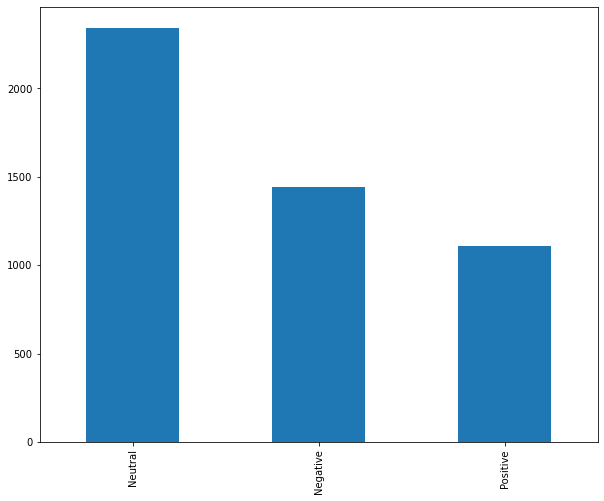

In [22]:
# Plot the distribution of Sentiment
distrib.plot(kind='bar',figsize=(10,8))

In [23]:
from wordcloud import WordCloud
import random

In [24]:
# Stem the titles
def stem_tweets(tweets):
  stemmer = PorterStemmer()
  tweets  = tweets.apply(lambda a: list(map(stemmer.stem,a.split())))
  return tweets

data_alu['Title'] = stem_tweets(data_alu['Title'])

In [25]:
data_alu.head()

Unnamed: 0                                              Title      Date  \
0        1409  [asian, morn, brief, lme, recommend, rusal, su...  1/1/2019   
1        1403  [live, futur, report, comex, copper, suffer, w...  1/2/2019   
2        1405  [eru, metal, usa, withdraw, lme, warehous, ser...  1/2/2019   
3        1406  [shfe, vs, lme, physic, arbitrag, copper, alum...  1/2/2019   
4        1407  [live, futur, report, lme, base, metal, downbe...  1/2/2019   

          Author                                            Summary  \
0  Dalton Barker  The latest news and price moves to start the A...   
1  Dalton Barker  Comex copper futures softened in the first tra...   
2    Alice Mason  Erus Metals USA LLC has withdrawn from London ...   
3     Ellie Wang  Arbitrage for copper, aluminium, zinc and nick...   
4    Hassan Butt  Base metals prices on the London Metal Exchang...   

   Sentiment_score_compound Sentiment  
0                    0.2263  Positive  
1                   -0.7184  Negative  
2                    0.0000   Neutral  
3                    0.0000   Neutral  
4                    0.0000   Neutral

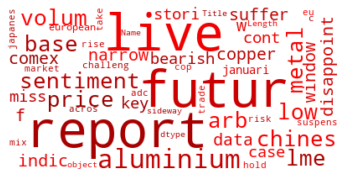

In [26]:
# Wordcloud of negative titles
def red_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 100%%, %d%%)" % random.randint(30, 50)

wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str(data_alu.loc[data_alu["Sentiment"]== 'Negative'].Title))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= red_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

In [27]:
# Most common words:
# report
# futur
# live

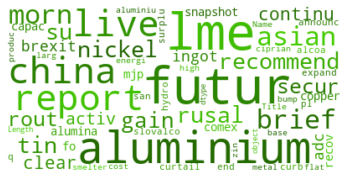

In [28]:
# Wordcloud of positive titles
def green_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(100, 100%%, %d%%)" % random.randint(20, 40)

wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str(data_alu.loc[data_alu["Sentiment"]== 'Positive'].Title))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= green_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

In [29]:
# Most common words:
# lme
# futur
# aluminium
# china

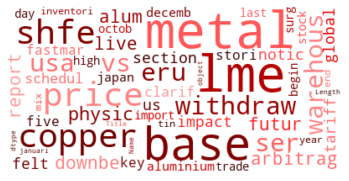

In [30]:
# Wordcloud of neutral titles
def color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 100%%, %d%%)" % random.randint(10, 80)

wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str(data_alu.loc[data_alu["Sentiment"]== 'Neutral'].Title))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

In [31]:
# Most common words:
# metal
# lme
# base
# price
# copper

In [32]:
data_alu.head()

Unnamed: 0                                              Title      Date  \
0        1409  [asian, morn, brief, lme, recommend, rusal, su...  1/1/2019   
1        1403  [live, futur, report, comex, copper, suffer, w...  1/2/2019   
2        1405  [eru, metal, usa, withdraw, lme, warehous, ser...  1/2/2019   
3        1406  [shfe, vs, lme, physic, arbitrag, copper, alum...  1/2/2019   
4        1407  [live, futur, report, lme, base, metal, downbe...  1/2/2019   

          Author                                            Summary  \
0  Dalton Barker  The latest news and price moves to start the A...   
1  Dalton Barker  Comex copper futures softened in the first tra...   
2    Alice Mason  Erus Metals USA LLC has withdrawn from London ...   
3     Ellie Wang  Arbitrage for copper, aluminium, zinc and nick...   
4    Hassan Butt  Base metals prices on the London Metal Exchang...   

   Sentiment_score_compound Sentiment  
0                    0.2263  Positive  
1                   -0.7184  Negative  
2                    0.0000   Neutral  
3                    0.0000   Neutral  
4                    0.0000   Neutral

In [33]:
data_alu["Date"] = pd.to_datetime(data_alu["Date"], utc=False) ## converting date column to "Y-M-D" date time

In [34]:
data_alu

Unnamed: 0                                              Title  \
0           1409  [asian, morn, brief, lme, recommend, rusal, su...   
1           1403  [live, futur, report, comex, copper, suffer, w...   
2           1405  [eru, metal, usa, withdraw, lme, warehous, ser...   
3           1406  [shfe, vs, lme, physic, arbitrag, copper, alum...   
4           1407  [live, futur, report, lme, base, metal, downbe...   
...          ...                                                ...   
4892        4263                         [five, key, stori, decemb]   
4893        4262            [japan, aluminium, import, surg, octob]   
4894        4261  [lme, base, metal, begin, last, trade, day, high]   
4895        4260      [stock, shfe, base, metal, copper, inventori]   
4896        4259   [lme, base, metal, mix, year, end, tin, januari]   

           Date                Author  \
0    2019-01-01         Dalton Barker   
1    2019-01-02         Dalton Barker   
2    2019-01-02           Alice Mason   
3    2019-01-02            Ellie Wang   
4    2019-01-02           Hassan Butt   
...         ...                   ...   
4892 2021-12-31  Fastmarkets MB staff   
4893 2021-12-31                Liz Ng   
4894 2021-12-31           Alice Mason   
4895 2021-12-31          Yingchi Yang   
4896 2021-12-31         Imogen Dudman   

                                                Summary  \
0     The latest news and price moves to start the A...   
1     Comex copper futures softened in the first tra...   
2     Erus Metals USA LLC has withdrawn from London ...   
3     Arbitrage for copper, aluminium, zinc and nick...   
4     Base metals prices on the London Metal Exchang...   
...                                                 ...   
4892  Here are five Fastmarkets stories you might ha...   
4893  Japan imported 260,100 tonnes of aluminium in ...   
4894  Base metals prices on the London Metal Exchang...   
4895  Most of the deliverable base metal stocks in S...   
4896  Base metals prices on the London Metal Exchang...   

      Sentiment_score_compound Sentiment  
0                       0.2263  Positive  
1                      -0.7184  Negative  
2                       0.0000   Neutral  
3                       0.0000   Neutral  
4                       0.0000   Neutral  
...                        ...       ...  
4892                    0.0000   Neutral  
4893                    0.0000   Neutral  
4894                    0.0000   Neutral  
4895                    0.0000   Neutral  
4896                    0.0000   Neutral  

[4897 rows x 7 columns]

In [35]:
data_alu['Title'] = data_alu['Title'].astype("string") ## coverting the datatype of description from object to string

In [36]:
data_alu.dtypes

Unnamed: 0                           int64
Title                               string
Date                        datetime64[ns]
Author                              object
Summary                             object
Sentiment_score_compound           float64
Sentiment                           object
dtype: object

In [37]:
data_alu = data_alu.drop_duplicates('Title') ## droping out duplicates

In [38]:
data_alu.count() ## total count of every column

Unnamed: 0                  4172
Title                       4172
Date                        4172
Author                      4172
Summary                     4172
Sentiment_score_compound    4172
Sentiment                   4172
dtype: int64

In [39]:
data_alu = data_alu.sort_values(['Date']) ## sorting the data according to dates

In [40]:
data_alu['Date'].describe() ## are there any articles missing within 3 years which can be said from the # unique values.

<ipython-input-40-38a79d051d73>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                    4172
unique                    756
top       2020-09-23 00:00:00
freq                       14
first     2019-01-01 00:00:00
last      2021-12-31 00:00:00
Name: Date, dtype: object

In [41]:
data_alu['Author'].describe()

count            4172
unique            241
top       Hassan Butt
freq              720
Name: Author, dtype: object

In [42]:
data_alu['Author'].unique() ## out of 4896 news article there are 241 unique authors which have written an artice on Aluminium in last 3 years

array(['Dalton Barker', 'Alice Mason', 'Ellie Wang', 'Hassan Butt',
       'Huaqing Fu',
       'Fastmarkets AMM staff, Felipe Peroni, Maria Tanatar, Nat Rudarakanchana, Miranda Song',
       'Perrine Faye', 'Renato Rostás', 'Fastmarkets MB staff', 'Hui Li',
       'Amy Lv', 'Michael Roh', 'Perrine Faye, Hui Li, Mia Aureus',
       'Susan Zou', 'Ellie Wang, Anna Xu, Violet Li, Hui Li', 'Anna Xu',
       'Justin Yang', 'Mia Aureus',
       'Justin Yang, Michael Roh, Hui Li, Mia Aureus, Renato Rostás',
       'Amy Hinton', 'Alice Mason, Michael Roh',
       'Hassan Butt, Amy Hinton',
       'Justin Yang, Alice Mason, Hui Li, Renato Rostás',
       'Alice Mason, Hui Li', 'Justin Yang, Alice Mason', 'Julian Luk',
       'Bradley MacAulay',
       'Justin Yang, Alice Mason, Michael Roh, Renato Rostás', 'Karen Ng',
       'Justin Yang, Michael Roh, Hui Li, Renato Rostás', 'Violet Li',
       'Andrea Hotter', 'Alice Mason, Michael Roh, Hui Li, Renato Rostás',
       'Alice Mason, Michael Roh,

In [43]:
yz = data_alu.groupby('Author').count()
yz ## author of the article who has writen max articles on Aluminium

Unnamed: 0  Title  Date  Summary  \
Author                                                                  
Alice Mason                                 377    377   377      377   
Alice Mason, Amy Hinton                       2      2     2        2   
Alice Mason, Ana de Liz                       2      2     2        2   
Alice Mason, Carrie Bone                      1      1     1        1   
Alice Mason, Consuelo de la Jara              2      2     2        2   
...                                         ...    ...   ...      ...   
Yasemin Esmen                                 3      3     3        3   
Yingchi Yang                                  9      9     9        9   
Yingchi Yang, Yiwen Ju, Jinfan Yang           1      1     1        1   
Yiwen Ju                                     15     15    15       15   
Yvonne Li                                     4      4     4        4   

                                     Sentiment_score_compound  Sentiment  
Author                                                                    
Alice Mason                                               377        377  
Alice Mason, Amy Hinton                                     2          2  
Alice Mason, Ana de Liz                                     2          2  
Alice Mason, Carrie Bone                                    1          1  
Alice Mason, Consuelo de la Jara                            2          2  
...                                                       ...        ...  
Yasemin Esmen                                               3          3  
Yingchi Yang                                                9          9  
Yingchi Yang, Yiwen Ju, Jinfan Yang                         1          1  
Yiwen Ju                                                   15         15  
Yvonne Li                                                   4          4  

[241 rows x 6 columns]

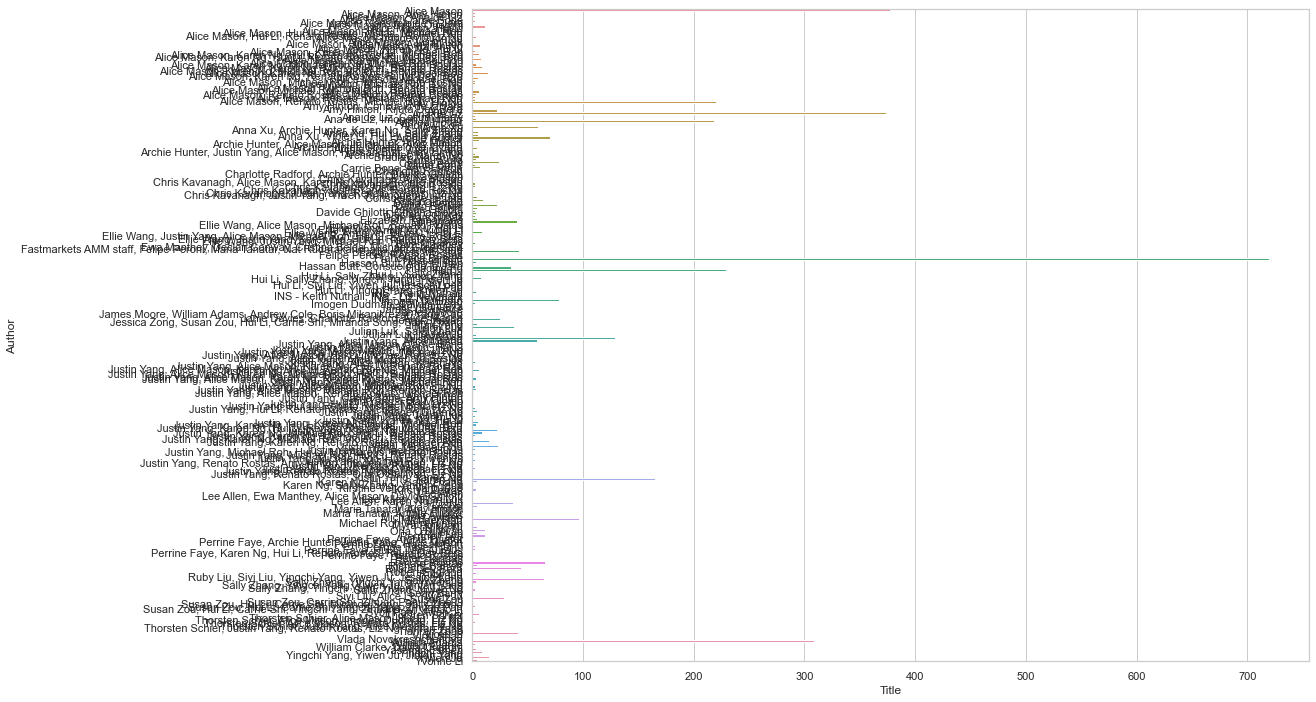

In [44]:
plt.figure(figsize =(15,12))
sb.set(style = 'whitegrid')

sb.barplot( x = yz['Title'], y = yz.index)
plt.savefig('ArticlesWrittenByAuthor.png')
plt.show() ## plot number of artciles written by author

In [44]:
data_alu['Title'][pd.isnull(data_alu['Title']) == True] ## to check NA values

Series([], Name: Title, dtype: string)

In [45]:
xy = data_alu.groupby('Date').count()
xy ## this shows how many articles were written about Aluminium on a particular day.

Unnamed: 0  Title  Author  Summary  Sentiment_score_compound  \
Date                                                                       
2019-01-01           1      1       1        1                         1   
2019-01-02           9      9       9        9                         9   
2019-01-03           8      8       8        8                         8   
2019-01-04           8      8       8        8                         8   
2019-01-07           7      7       7        7                         7   
...                ...    ...     ...      ...                       ...   
2021-12-24           4      4       4        4                         4   
2021-12-28           1      1       1        1                         1   
2021-12-29           4      4       4        4                         4   
2021-12-30           6      6       6        6                         6   
2021-12-31           3      3       3        3                         3   

            Sentiment  
Date                   
2019-01-01          1  
2019-01-02          9  
2019-01-03          8  
2019-01-04          8  
2019-01-07          7  
...               ...  
2021-12-24          4  
2021-12-28          1  
2021-12-29          4  
2021-12-30          6  
2021-12-31          3  

[756 rows x 6 columns]

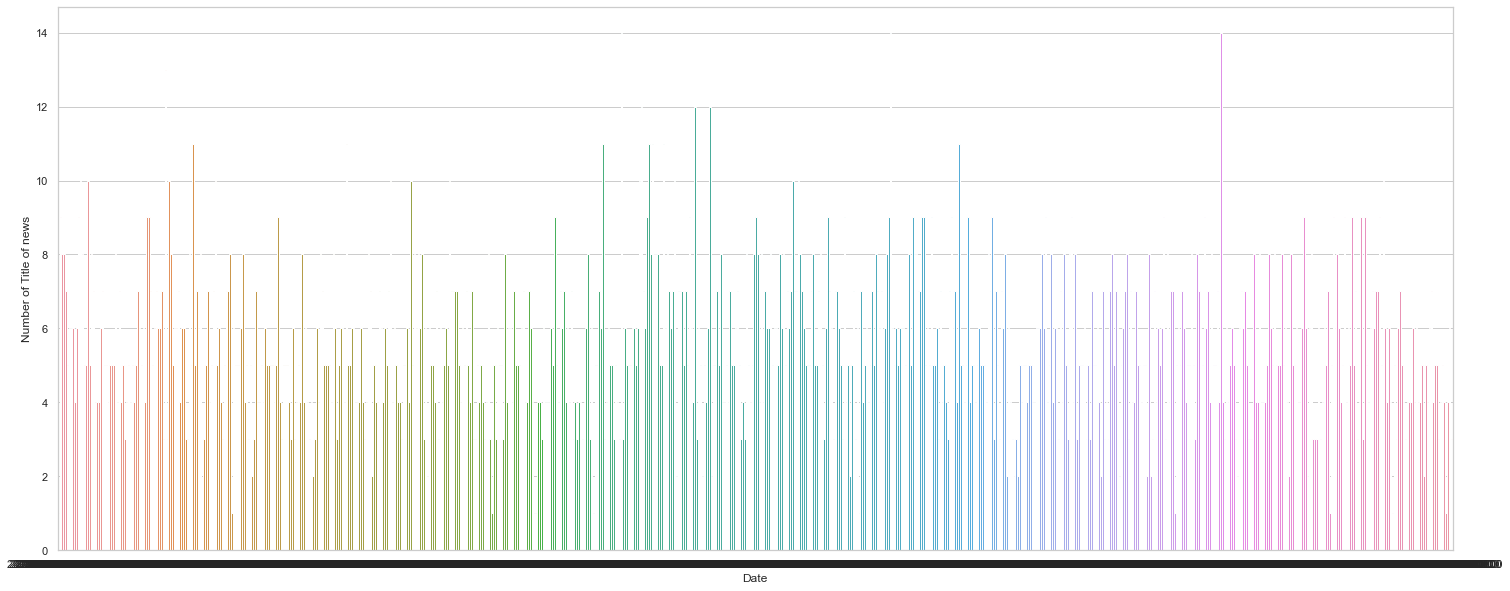

In [47]:
plt.figure(figsize =(25,10))
ax = sb.barplot( x = xy.index , y = xy['Title'])
ax.set(xlabel = 'Date', ylabel = 'Number of Title of news')
plt.show() ## plot Number of Title of reviews by day

In [46]:
data_alu.drop('Unnamed: 0', axis=1) ## droping out column "Unnamed: 0"

Title       Date  \
0     ['asian', 'morn', 'brief', 'lme', 'recommend',... 2019-01-01   
1     ['live', 'futur', 'report', 'comex', 'copper',... 2019-01-02   
2     ['eru', 'metal', 'usa', 'withdraw', 'lme', 'wa... 2019-01-02   
3     ['shfe', 'vs', 'lme', 'physic', 'arbitrag', 'c... 2019-01-02   
4     ['live', 'futur', 'report', 'lme', 'base', 'me... 2019-01-02   
...                                                 ...        ...   
4890  ['high', 'energi', 'cost', 'bump', 'lme', 'alu... 2021-12-30   
4891  ['lme', 'base', 'metal', 'futur', 'larg', 'fla... 2021-12-30   
4894  ['lme', 'base', 'metal', 'begin', 'last', 'tra... 2021-12-31   
4893  ['japan', 'aluminium', 'import', 'surg', 'octob'] 2021-12-31   
4896  ['lme', 'base', 'metal', 'mix', 'year', 'end',... 2021-12-31   

             Author                                            Summary  \
0     Dalton Barker  The latest news and price moves to start the A...   
1     Dalton Barker  Comex copper futures softened in the first tra...   
2       Alice Mason  Erus Metals USA LLC has withdrawn from London ...   
3        Ellie Wang  Arbitrage for copper, aluminium, zinc and nick...   
4       Hassan Butt  Base metals prices on the London Metal Exchang...   
...             ...                                                ...   
4890    Justin Yang  Base metals on the London Metal Exchange mostl...   
4891   Callum Perry  Base metal futures on the London Metal Exchang...   
4894    Alice Mason  Base metals prices on the London Metal Exchang...   
4893         Liz Ng  Japan imported 260,100 tonnes of aluminium in ...   
4896  Imogen Dudman  Base metals prices on the London Metal Exchang...   

      Sentiment_score_compound Sentiment  
0                       0.2263  Positive  
1                      -0.7184  Negative  
2                       0.0000   Neutral  
3                       0.0000   Neutral  
4                       0.0000   Neutral  
...                        ...       ...  
4890                    0.2732  Positive  
4891                    0.4404  Positive  
4894                    0.0000   Neutral  
4893                    0.0000   Neutral  
4896                    0.0000   Neutral  

[4172 rows x 6 columns]

In [47]:
data_alu.to_csv('data_aluminium_sentiment_score.csv') ## store df "data_alu" to a csv file

In [48]:
ssc = data_alu.groupby('Date')[['Sentiment_score_compound']].mean() ## create df with date as index and sentiment_score_compound as a column

In [49]:
ssc

Sentiment_score_compound
Date                                
2019-01-01                  0.226300
2019-01-02                 -0.096833
2019-01-03                 -0.034225
2019-01-04                 -0.030675
2019-01-07                  0.135514
...                              ...
2021-12-24                  0.127625
2021-12-28                  0.000000
2021-12-29                  0.317300
2021-12-30                  0.263033
2021-12-31                  0.000000

[756 rows x 1 columns]

# Sentiment Score and Aluminium Price Visualization

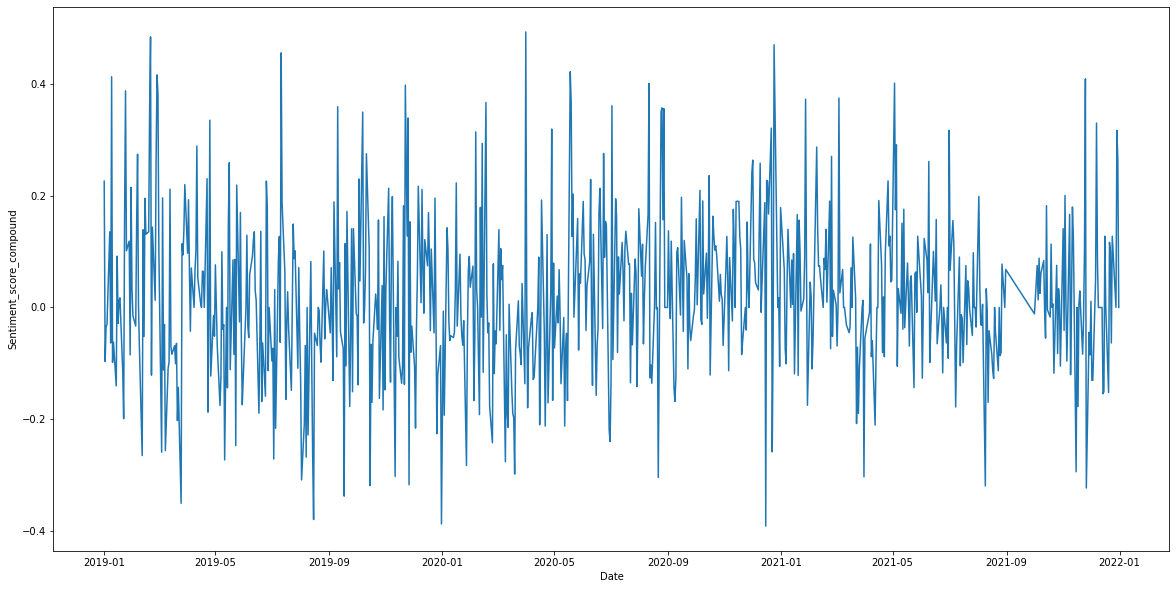

In [50]:
plt.figure(figsize =(20, 10))
sb.lineplot(x = ssc.index, y = ssc['Sentiment_score_compound'])
plt.savefig('CompoundScoreVSdate.png')
plt.show() ## Plot the mean compound scores according to the dates

In [51]:
prices_alu = pd.read_excel("Aluminium_trend_apem.xlsx")

In [52]:
prices_alu.head(10)

Open    Close     High   Low       Date  Unnamed: 5
0  2818.45  2827.85  2807.25   681 2021-12-31         NaN
1  2818.15  2828.28  2812.00   889 2021-12-30         NaN
2  2820.45  2822.50  2801.78  1365 2021-12-29         NaN
3  2836.85  2848.26  2814.63   912 2021-12-24         NaN
4  2846.00  2846.86  2828.50  1359 2021-12-23         NaN
5  2824.50  2839.50  2788.00  1827 2021-12-22         NaN
6  2753.85  2762.50  2674.75   119 2021-12-21         NaN
7  2715.00  2730.25  2670.85  1109 2021-12-20         NaN
8  2724.30  2742.69  2667.04   132 2021-12-17         NaN
9  2667.00  2678.00  2622.00   172 2021-12-16         NaN

In [53]:
prices_alu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Open        758 non-null    float64       
 1   Close       758 non-null    float64       
 2   High        758 non-null    float64       
 3   Low         758 non-null    int64         
 4   Date        758 non-null    datetime64[ns]
 5   Unnamed: 5  0 non-null      float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 35.7 KB


In [54]:
#prices_alu["change"] = prices_alu["Close"].diff(periods=-1)
#prices_alu["change"] = prices_alu["change"].round(3)
# Delete last element
#prices_alu = prices_alu[:-1]
#prices_alu.head() ## From Jithin, check if needed

In [55]:
prices_alu["Date"] = pd.to_datetime(prices_alu["Date"], utc=False) ## converting date time not in TimeStamp format

In [56]:
prices_alu.index = prices_alu['Date'] ## setting date as an index
prices_alu

Open    Close     High   Low       Date  Unnamed: 5
Date                                                              
2021-12-31  2818.45  2827.85  2807.25   681 2021-12-31         NaN
2021-12-30  2818.15  2828.28  2812.00   889 2021-12-30         NaN
2021-12-29  2820.45  2822.50  2801.78  1365 2021-12-29         NaN
2021-12-24  2836.85  2848.26  2814.63   912 2021-12-24         NaN
2021-12-23  2846.00  2846.86  2828.50  1359 2021-12-23         NaN
...             ...      ...      ...   ...        ...         ...
2019-01-08  1864.50  1865.00  1858.00  2545 2019-01-08         NaN
2019-01-07  1878.50  1878.65  1864.15  1829 2019-01-07         NaN
2019-01-04  1865.00  1875.00  1840.25  1667 2019-01-04         NaN
2019-01-03  1835.00  1845.25  1791.35  2440 2019-01-03         NaN
2019-01-02  1797.00  1851.20  1790.17  3599 2019-01-02         NaN

[758 rows x 6 columns]

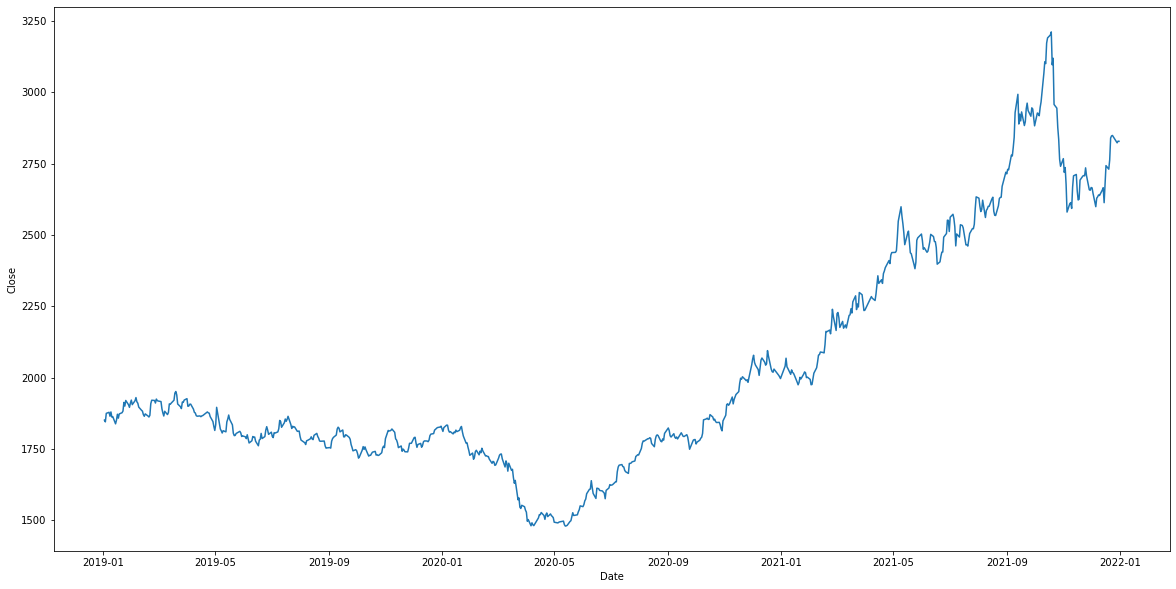

In [57]:
# Plot only close prices history
plt.figure(figsize =(20, 10))
sb.lineplot(x = prices_alu.index, y = prices_alu['Close'])
plt.savefig('ClosePricesVSdate.png')
plt.show()

In [58]:
# Depicts all data using candlestick charts
# Plotting Candlestick
trace = go.Ohlc(x=prices_alu.index,
                open=prices_alu['Open'],
                high=prices_alu['High'],
                low=prices_alu['Low'],
                close=prices_alu['Close'])
data = [trace]
iplot(data, filename='simple_ohlc')

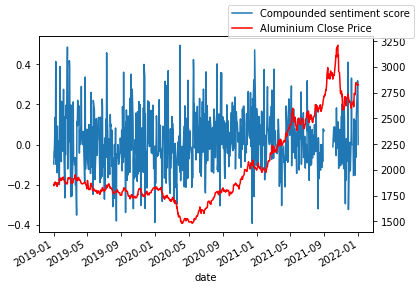

In [59]:
DF = pd.DataFrame({"date": prices_alu['Date'],
                   "Compounded sentiment score": ssc['Sentiment_score_compound'], 
                   "Aluminium Close Price": prices_alu['Close']})

ax = DF.plot(x="date", y="Compounded sentiment score", legend=False)
ax2 = ax.twinx()
DF.plot(x="date", y="Aluminium Close Price", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show() ## Plot both the Aluminium close and mean compounded sentiment score for each day

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 432x288 with 0 Axes>

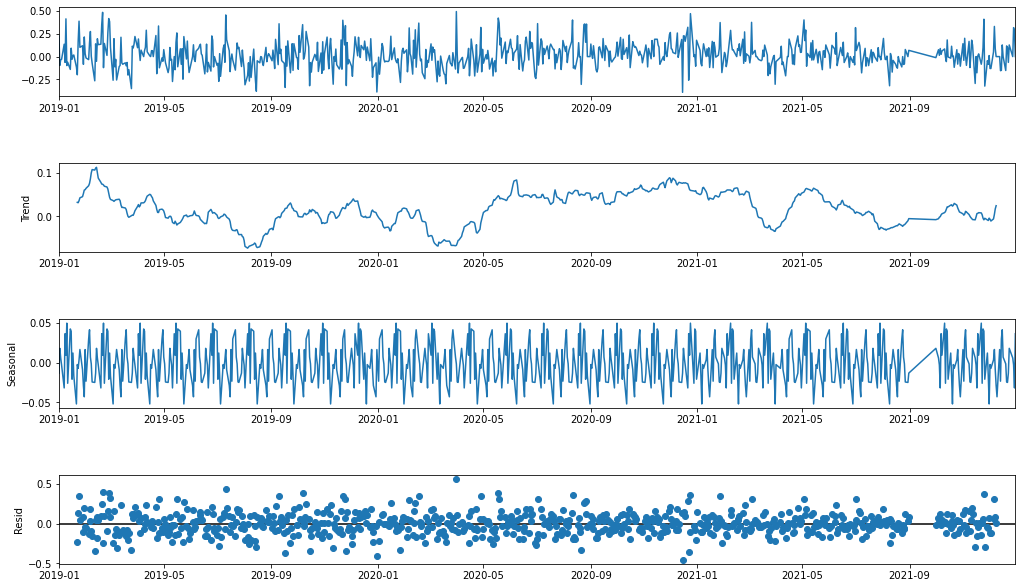

In [61]:
#Seasonality check
result = seasonal_decompose(ssc, period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

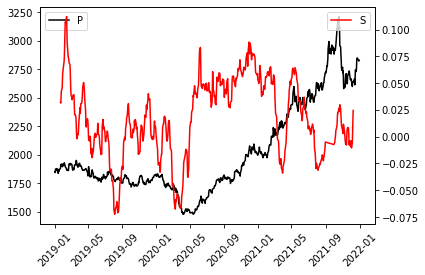

In [62]:
fig, ax_left = plt.subplots()
plt.xticks(rotation=45)
ax_right = ax_left.twinx()

ax_left.plot(prices_alu.index, prices_alu['Close'], color='black')
ax_right.plot(result.trend.index, result.trend, color='red')
ax_left.legend('Price of aluminium')
ax_right.legend('Sentiment score')

## Linear Regression Model (from previous day WITHOUT sentiment score)

In [64]:
prices_nossc = prices_alu
prices_nossc.head()

Open    Close     High   Low       Date  Unnamed: 5
Date                                                              
2021-12-31  2818.45  2827.85  2807.25   681 2021-12-31         NaN
2021-12-30  2818.15  2828.28  2812.00   889 2021-12-30         NaN
2021-12-29  2820.45  2822.50  2801.78  1365 2021-12-29         NaN
2021-12-24  2836.85  2848.26  2814.63   912 2021-12-24         NaN
2021-12-23  2846.00  2846.86  2828.50  1359 2021-12-23         NaN

In [65]:
# Dropping column 'Unnamed: 5' and 'Date' (not index)
prices_nossc.drop('Unnamed: 5', axis=1, inplace=True)
prices_nossc.drop('Date', axis=1, inplace=True)

In [66]:
Min_date = prices_nossc.index.min()
Max_date = prices_nossc.index.max()
print ("First date is",Min_date)
print ("Last date is",Max_date)
print (Max_date - Min_date)

First date is 2019-01-02 00:00:00
Last date is 2021-12-31 00:00:00
1094 days 00:00:00


In [67]:
# Creating new column 
num = 30 # forcasting 30 days ahead
prices_nossc['label'] = prices_nossc['Close'].shift(-num) # Creating new column 'label' to forcasting 'Close' column
                                     
print(prices_nossc.shape)

(758, 5)


In [88]:
Data = prices_nossc.drop(['label'],axis=1)
X = Data.values
X = preprocessing.scale(X)
X = X[:-num]

prices_nossc.dropna(inplace=True)
Target = prices_nossc.label
y = Target.values

print(np.shape(X), np.shape(y))

(698, 4) (728,)


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ValueError: Found input variables with inconsistent numbers of samples: [698, 728]

In [70]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [71]:
lr.score(X_test , y_test) #Returns the coefficient of determination (R² of the prediction ~ accuracy)

0.864597621019345

In [72]:
print('Coefficients: \n', lr.coef_) #Coefficients of dependent variables

Coefficients: 
 [-504.09315657  648.57235854  201.68643728    9.09871341]


In [73]:
y_predict = lr.predict(X_test)

In [74]:
lr_mse = mean_squared_error(y_predict, y_test) ## Finding the mean Square Error of the model
print(lr_mse)

22407.409788097862


### Predictions

In [75]:
# Prediction (over 30 days defined previously)

X_Predict = X[-num:]
Forecast = lr.predict(X_Predict) 
print(Forecast)

[1866.40975484 1888.05176441 1881.47649614 1941.38707228 1932.13790589
 1916.25561489 1875.81563481 1885.93301544 1885.05276153 1876.22541764
 1855.80182285 1863.24136416 1867.01624002 1846.21474814 1865.91305633
 1883.79377125 1931.52499015 1890.50477759 1907.37948461 1903.26937385
 1883.86578298 1897.41833489 1898.55468492 1872.95664657 1844.10321572
 1850.93473371 1850.32315707 1865.75768968 1856.23385699 1859.28426387]


### Plotting the results

In [76]:
# creating timeserie from the last date

trange = pd.date_range('2022-01-01', periods=num, freq='d')
trange

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
               '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-29', '2022-01-30'],
              dtype='datetime64[ns]', freq='D')

In [77]:
# Adding the predicted values to dateframe
Predict_df = pd.DataFrame(Forecast, index=trange)
Predict_df.columns = ['forecast']
Predict_df

forecast
2022-01-01  1866.409755
2022-01-02  1888.051764
2022-01-03  1881.476496
2022-01-04  1941.387072
2022-01-05  1932.137906
2022-01-06  1916.255615
2022-01-07  1875.815635
2022-01-08  1885.933015
2022-01-09  1885.052762
2022-01-10  1876.225418
2022-01-11  1855.801823
2022-01-12  1863.241364
2022-01-13  1867.016240
2022-01-14  1846.214748
2022-01-15  1865.913056
2022-01-16  1883.793771
2022-01-17  1931.524990
2022-01-18  1890.504778
2022-01-19  1907.379485
2022-01-20  1903.269374
2022-01-21  1883.865783
2022-01-22  1897.418335
2022-01-23  1898.554685
2022-01-24  1872.956647
2022-01-25  1844.103216
2022-01-26  1850.934734
2022-01-27  1850.323157
2022-01-28  1865.757690
2022-01-29  1856.233857
2022-01-30  1859.284264

In [78]:
df_concat = pd.concat([prices_nossc, Predict_df], axis=1)
df_concat.tail(num)

Open  Close  High  Low  label     forecast
2022-01-01   NaN    NaN   NaN  NaN    NaN  1866.409755
2022-01-02   NaN    NaN   NaN  NaN    NaN  1888.051764
2022-01-03   NaN    NaN   NaN  NaN    NaN  1881.476496
2022-01-04   NaN    NaN   NaN  NaN    NaN  1941.387072
2022-01-05   NaN    NaN   NaN  NaN    NaN  1932.137906
2022-01-06   NaN    NaN   NaN  NaN    NaN  1916.255615
2022-01-07   NaN    NaN   NaN  NaN    NaN  1875.815635
2022-01-08   NaN    NaN   NaN  NaN    NaN  1885.933015
2022-01-09   NaN    NaN   NaN  NaN    NaN  1885.052762
2022-01-10   NaN    NaN   NaN  NaN    NaN  1876.225418
2022-01-11   NaN    NaN   NaN  NaN    NaN  1855.801823
2022-01-12   NaN    NaN   NaN  NaN    NaN  1863.241364
2022-01-13   NaN    NaN   NaN  NaN    NaN  1867.016240
2022-01-14   NaN    NaN   NaN  NaN    NaN  1846.214748
2022-01-15   NaN    NaN   NaN  NaN    NaN  1865.913056
2022-01-16   NaN    NaN   NaN  NaN    NaN  1883.793771
2022-01-17   NaN    NaN   NaN  NaN    NaN  1931.524990
2022-01-18   NaN    NaN   NaN  NaN    NaN  1890.504778
2022-01-19   NaN    NaN   NaN  NaN    NaN  1907.379485
2022-01-20   NaN    NaN   NaN  NaN    NaN  1903.269374
2022-01-21   NaN    NaN   NaN  NaN    NaN  1883.865783
2022-01-22   NaN    NaN   NaN  NaN    NaN  1897.418335
2022-01-23   NaN    NaN   NaN  NaN    NaN  1898.554685
2022-01-24   NaN    NaN   NaN  NaN    NaN  1872.956647
2022-01-25   NaN    NaN   NaN  NaN    NaN  1844.103216
2022-01-26   NaN    NaN   NaN  NaN    NaN  1850.934734
2022-01-27   NaN    NaN   NaN  NaN    NaN  1850.323157
2022-01-28   NaN    NaN   NaN  NaN    NaN  1865.757690
2022-01-29   NaN    NaN   NaN  NaN    NaN  1856.233857
2022-01-30   NaN    NaN   NaN  NaN    NaN  1859.284264

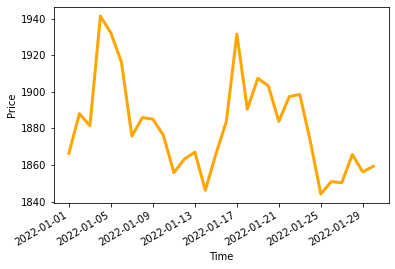

In [79]:
# zooming in the forecast part

df_concat['forecast'].plot(color='orange', linewidth=3)
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

## Linear Regression Model (from previous day WITH sentiment score)

In [72]:
prices_ssc = pd.merge(ssc,prices_alu, left_index=True, right_index=True) ## concatinating sentiment score and aluminium data (prices)

In [73]:
prices_ssc.tail()

Sentiment_score_compound     Open    Close     High   Low  \
Date                                                                    
2021-12-23                 -0.063640  2846.00  2846.86  2828.50  1359   
2021-12-24                  0.127625  2836.85  2848.26  2814.63   912   
2021-12-29                  0.317300  2820.45  2822.50  2801.78  1365   
2021-12-30                  0.263033  2818.15  2828.28  2812.00   889   
2021-12-31                  0.000000  2818.45  2827.85  2807.25   681   

                 Date  Unnamed: 5  
Date                               
2021-12-23 2021-12-23         NaN  
2021-12-24 2021-12-24         NaN  
2021-12-29 2021-12-29         NaN  
2021-12-30 2021-12-30         NaN  
2021-12-31 2021-12-31         NaN

In [74]:
# Dropping column 'Unnamed: 5'
prices_ssc.drop('Unnamed: 5', axis=1, inplace=True)
prices_ssc.drop('Date', axis=1, inplace=True)

In [75]:
Min_date2 = prices_ssc.index.min()
Max_date2 = prices_ssc.index.max()
print ("First date is",Min_date2)
print ("Last date is",Max_date2)
print (Max_date2 - Min_date2)

First date is 2019-01-02 00:00:00
Last date is 2021-12-31 00:00:00
1094 days 00:00:00


In [76]:
# Creating new column 
num2 = 30 # forcasting 30 days ahead
prices_ssc['label'] = prices_ssc['Close'].shift(-num2) # forcasting Close column
                                     
print(prices_ssc.shape)

(736, 6)


In [77]:
Data2 = prices_ssc.drop(['label'],axis=1)
X_2 = Data2.values
X_2 = preprocessing.scale(X_2)
X_2 = X_2[:-num2]

prices_ssc.dropna(inplace=True)
Target2 = prices_ssc.label
y_2 = Target2.values

print(np.shape(X_2), np.shape(y_2))

(706, 5) (706,)


In [78]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.2)

In [79]:
lr2 = LinearRegression()
lr2.fit(X_train2, y_train2)

LinearRegression()

In [80]:
lr2.score(X_test2 , y_test2) #Returns the coefficient of determination R^2 of the prediction

0.8693494916482157

In [81]:
print('Coefficients: \n', lr2.coef_) #Coefficients of dependent variables

Coefficients: 
 [  -4.88954921  186.10650069 -537.58804452  713.32208758  -36.09409985]


In [82]:
y_predict2 = lr2.predict(X_test2)

In [83]:
lr2_mse = mean_squared_error(y_predict2, y_test2) ## Finding the mean Square Error of the model
print(lr2_mse)

19166.0697878574


### Predictions

In [84]:
# Prediction (over 30 days defined previously)

X_Predict2 = X_2[-num2:]
Forecast2 = lr2.predict(X_Predict2)
print(Forecast2)

[2992.88632114 3006.2188736  2954.59608088 3070.39161409 3037.05391879
 3116.44462229 3137.59291742 3230.86140844 3117.64355665 3058.11247557
 2739.47481339 2867.03994507 2910.0874139  2897.95486323 2532.96499573
 2565.67475685 2715.78970398 2766.78915951 2779.12549042 2658.77623322
 2493.62589883 2574.12557903 2593.46040002 2568.41713258 2688.15021326
 2677.44752338 2692.03427288 2708.72199194 2576.22371366 2677.88101107]


### Plotting the results

In [85]:
# creating timeserie from the last date

trange = pd.date_range('2022-01-01', periods=num2, freq='d')
trange

DatetimeIndex(['2021-12-31', '2022-01-01', '2022-01-02', '2022-01-03',
               '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07',
               '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-15',
               '2022-01-16', '2022-01-17', '2022-01-18', '2022-01-19',
               '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23',
               '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
               '2022-01-28', '2022-01-29'],
              dtype='datetime64[ns]', freq='D')

In [86]:
# Adding the predicted values to dateframe
Predict_df2 = pd.DataFrame(Forecast2, index=trange)
Predict_df2.columns = ['forecast']
Predict_df2

forecast
2021-12-31  2992.886321
2022-01-01  3006.218874
2022-01-02  2954.596081
2022-01-03  3070.391614
2022-01-04  3037.053919
2022-01-05  3116.444622
2022-01-06  3137.592917
2022-01-07  3230.861408
2022-01-08  3117.643557
2022-01-09  3058.112476
2022-01-10  2739.474813
2022-01-11  2867.039945
2022-01-12  2910.087414
2022-01-13  2897.954863
2022-01-14  2532.964996
2022-01-15  2565.674757
2022-01-16  2715.789704
2022-01-17  2766.789160
2022-01-18  2779.125490
2022-01-19  2658.776233
2022-01-20  2493.625899
2022-01-21  2574.125579
2022-01-22  2593.460400
2022-01-23  2568.417133
2022-01-24  2688.150213
2022-01-25  2677.447523
2022-01-26  2692.034273
2022-01-27  2708.721992
2022-01-28  2576.223714
2022-01-29  2677.881011

In [87]:
df_concat2 = pd.concat([prices_ssc, Predict_df2], axis=1)
df_concat2.tail(num2)

Sentiment_score_compound  Open  Close  High  Low  label  \
2021-12-31                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-01                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-02                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-03                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-04                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-05                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-06                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-07                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-08                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-09                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-10                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-11                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-12                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-13                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-14                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-15                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-16                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-17                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-18                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-19                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-20                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-21                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-22                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-23                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-24                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-25                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-26                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-27                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-28                       NaN   NaN    NaN   NaN  NaN    NaN   
2022-01-29                       NaN   NaN    NaN   NaN  NaN    NaN   

               forecast  
2021-12-31  2992.886321  
2022-01-01  3006.218874  
2022-01-02  2954.596081  
2022-01-03  3070.391614  
2022-01-04  3037.053919  
2022-01-05  3116.444622  
2022-01-06  3137.592917  
2022-01-07  3230.861408  
2022-01-08  3117.643557  
2022-01-09  3058.112476  
2022-01-10  2739.474813  
2022-01-11  2867.039945  
2022-01-12  2910.087414  
2022-01-13  2897.954863  
2022-01-14  2532.964996  
2022-01-15  2565.674757  
2022-01-16  2715.789704  
2022-01-17  2766.789160  
2022-01-18  2779.125490  
2022-01-19  2658.776233  
2022-01-20  2493.625899  
2022-01-21  2574.125579  
2022-01-22  2593.460400  
2022-01-23  2568.417133  
2022-01-24  2688.150213  
2022-01-25  2677.447523  
2022-01-26  2692.034273  
2022-01-27  2708.721992  
2022-01-28  2576.223714  
2022-01-29  2677.881011

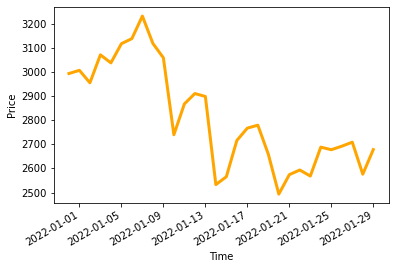

In [88]:
# zooming in the forecast part

df_concat2['forecast'].plot(color='orange', linewidth=3)
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()